# CS-7641 Assignment 1

Load Necessary Packages

In [78]:
import numpy as np
import pandas as pd
import mlrose
import timeit
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score




## Load Phishing Dataset

In [22]:
# If this file reference does not work, please update accordingly.
df_phish = pd.read_csv("./dataset/phishing/Phishing_Legitimate_full.csv")

df_phish = df_phish.drop(columns=["id"])

# Generate for Phishing Data
# target column that we want is 'CLASS_LABEL'
df_phish_X = df_phish.drop(["CLASS_LABEL"], axis=1)
df_phish_y = df_phish["CLASS_LABEL"]

X_train, X_test, y_train, y_test = train_test_split(
    np.array(df_phish_X), np.array(df_phish_y), test_size=0.20
)

# Normalize feature data
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# One hot encode target values
one_hot = OneHotEncoder()

y_train_hot = one_hot.fit_transform(y_train.reshape(-1, 1)).todense()
y_test_hot = one_hot.transform(y_test.reshape(-1, 1)).todense()

## Gradient Descent

c:\Users\trevo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


Time for iteration 10: 0.6857135000027483
Train score for iteration 10: 0.957875
Test score for iteration 10: 0.95


c:\Users\trevo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


Time for iteration 100: 6.743466500003706
Train score for iteration 100: 0.986125
Test score for iteration 100: 0.9625
Time for iteration 500: 7.682310299991514
Train score for iteration 500: 0.988875
Test score for iteration 500: 0.965
Time for iteration 1000: 8.396626300003845
Train score for iteration 1000: 0.988875
Test score for iteration 1000: 0.965
Time for iteration 2500: 8.339451100007864
Train score for iteration 2500: 0.988875
Test score for iteration 2500: 0.965


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Time for iteration 5000: 8.250283600005787
Train score for iteration 5000: 0.988875
Test score for iteration 5000: 0.965


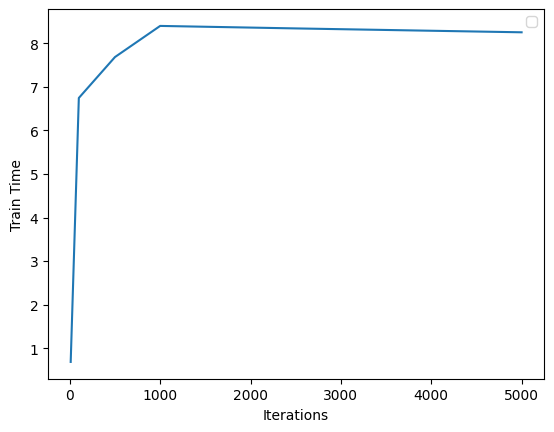

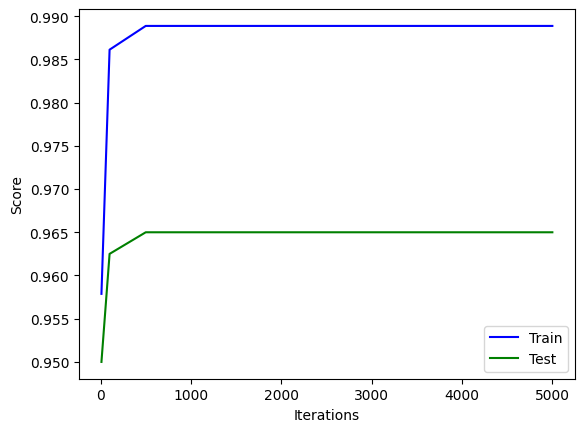

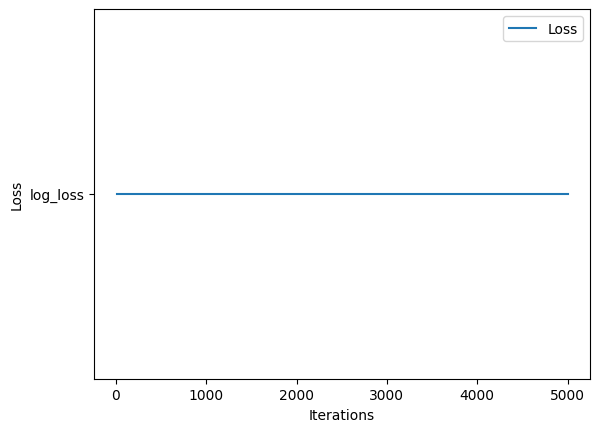

In [80]:
iterations = [10, 100, 500, 1000, 2500, 5000]
gd_result = {}

for curr_iter in iterations:
    clf = MLPClassifier(
        activation="logistic",
        alpha=1e-5,
        hidden_layer_sizes=[50, 10],
        random_state=50,
        learning_rate_init=0.01,
        max_iter=curr_iter,
    )
    start_time = timeit.default_timer()
    clf.fit(X_train, y_train)
    end_time = timeit.default_timer()
    train_time = end_time - start_time

    y_train_pred = clf.predict(X_train)

    y_train_accuracy = accuracy_score(np.asarray(y_train), np.asarray(y_train_pred))

    y_test_pred = clf.predict(X_test)
    y_test_accuracy = accuracy_score(np.asarray(y_test), np.asarray(y_test_pred))
    print("Time for iteration " + str(curr_iter) + ": " + str(train_time))
    print("Train score for iteration " + str(curr_iter) + ": " + str(y_train_accuracy))
    print("Test score for iteration " + str(curr_iter) + ": " + str(y_test_accuracy))

    gd_result[curr_iter] = {
        "train_time": train_time,
        "train_score": y_train_accuracy,
        "test_score": y_test_accuracy,
        "loss": clf.loss
    }

gd_train_time_results = []
gd_train_score_results = []
gd_test_score_results = []
gd_loss_results = []

for an_iter in gd_result.keys():
    gd_train_time_results.append(gd_result[an_iter]['train_time'])
    gd_train_score_results.append(gd_result[an_iter]['train_score'])
    gd_test_score_results.append(gd_result[an_iter]['test_score'])
    gd_loss_results.append(gd_result[an_iter]['loss'])

plt.plot(iterations, gd_train_time_results)
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Train Time")
plt.show()
plt.plot(iterations, gd_train_score_results, label="Train", color='blue')
plt.plot(iterations, gd_test_score_results, label="Test", color="green")
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Score")
plt.show()
plt.plot(iterations, gd_loss_results, label="Loss")
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

## Random Hill Climbing

Time for iteration 10: 0.2683938999980455
Train score for iteration 10: 0.523125
Test score for iteration 10: 0.5345
Time for iteration 100: 2.3626545000006445
Train score for iteration 100: 0.546125
Test score for iteration 100: 0.556
Time for iteration 500: 12.728987399998005
Train score for iteration 500: 0.58125
Test score for iteration 500: 0.582
Time for iteration 1000: 25.393062099989038
Train score for iteration 1000: 0.5935
Test score for iteration 1000: 0.597
Time for iteration 2500: 67.08888450000086
Train score for iteration 2500: 0.642125
Test score for iteration 2500: 0.6445


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Time for iteration 5000: 132.67011549999006
Train score for iteration 5000: 0.7195
Test score for iteration 5000: 0.7175


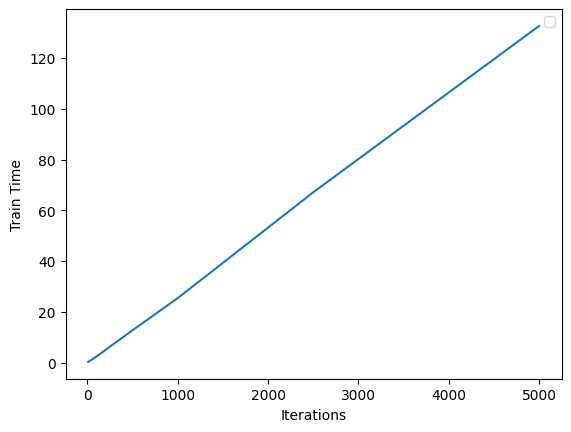

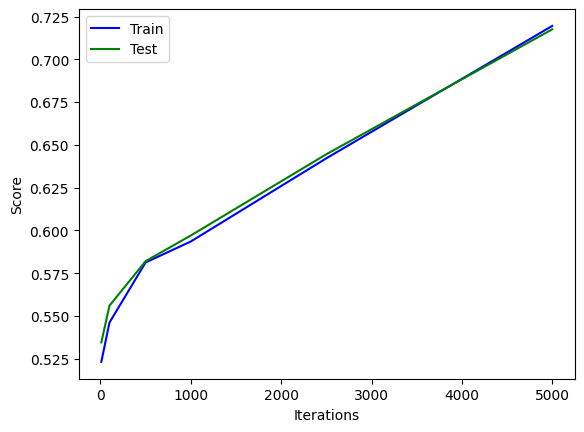

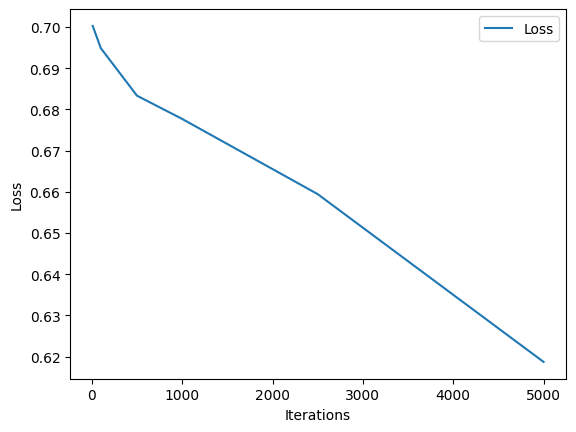

In [81]:
# Initialize neural network object and fit object
iterations = [10,100,500,1000,2500,5000]
rhc_result = {}

for curr_iter in iterations:
    clf = mlrose.NeuralNetwork(
        hidden_nodes=[50, 10],
        activation="sigmoid",
        algorithm="random_hill_climb",
        max_iters=curr_iter,
        bias=True,
        is_classifier=True,
        learning_rate=0.1,
        # early_stopping=True,
        # clip_max=5,
        max_attempts=100,
        random_state=50,
    )

    start_time = timeit.default_timer()
    clf.fit(X_train, y_train)
    end_time = timeit.default_timer()
    train_time = end_time - start_time

    y_train_pred = clf.predict(X_train)

    y_train_accuracy = accuracy_score(np.asarray(y_train), np.asarray(y_train_pred))

    y_test_pred = clf.predict(X_test)
    y_test_accuracy = accuracy_score(np.asarray(y_test), np.asarray(y_test_pred))
    print("Time for iteration " + str(curr_iter) + ": " + str(train_time))
    print("Train score for iteration " + str(curr_iter) + ": " + str(y_train_accuracy))
    print("Test score for iteration " + str(curr_iter) + ": " + str(y_test_accuracy))

    rhc_result[curr_iter] = {
        "train_time": train_time,
        "train_score": y_train_accuracy,
        "test_score": y_test_accuracy,
        "fitness_Curve": clf.fitness_curve,
        "loss": clf.loss
    }

    
rhc_train_time_results = []
rhc_train_score_results = []
rhc_test_score_results = []
rhc_loss_results = []

for an_iter in rhc_result.keys():
    rhc_train_time_results.append(rhc_result[an_iter]['train_time'])
    rhc_train_score_results.append(rhc_result[an_iter]['train_score'])
    rhc_test_score_results.append(rhc_result[an_iter]['test_score'])
    rhc_loss_results.append(rhc_result[an_iter]['loss'])

plt.plot(iterations, rhc_train_time_results)
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Train Time")
plt.show()
plt.plot(iterations, rhc_train_score_results, label="Train", color='blue')
plt.plot(iterations, rhc_test_score_results, label="Test", color="green")
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Score")
plt.show()
plt.plot(iterations, rhc_loss_results, label="Loss")
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()


## Simulated Annealing

Time for iteration 10: 0.3687272000097437
Train score for iteration 10: 0.523125
Test score for iteration 10: 0.5345
Time for iteration 10: 0.3405542999971658
Train score for iteration 10: 0.523125
Test score for iteration 10: 0.5345
Time for iteration 10: 0.3710216000035871
Train score for iteration 10: 0.523125
Test score for iteration 10: 0.5345
Time for iteration 100: 3.4727770000026794
Train score for iteration 100: 0.523875
Test score for iteration 100: 0.544
Time for iteration 100: 3.3207976999983657
Train score for iteration 100: 0.523875
Test score for iteration 100: 0.544
Time for iteration 100: 3.0802370000019437
Train score for iteration 100: 0.523875
Test score for iteration 100: 0.544
Time for iteration 500: 16.014157000012347
Train score for iteration 500: 0.55
Test score for iteration 500: 0.544
Time for iteration 500: 15.813238899994758
Train score for iteration 500: 0.55
Test score for iteration 500: 0.544
Time for iteration 500: 16.01933690000442
Train score for iter

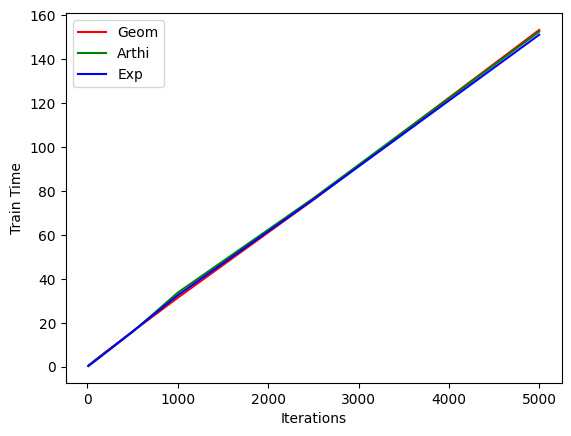

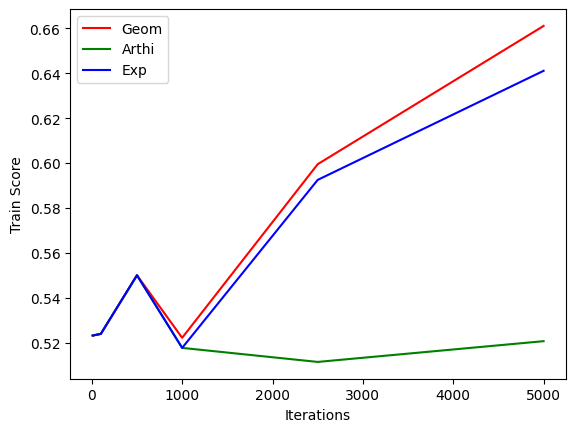

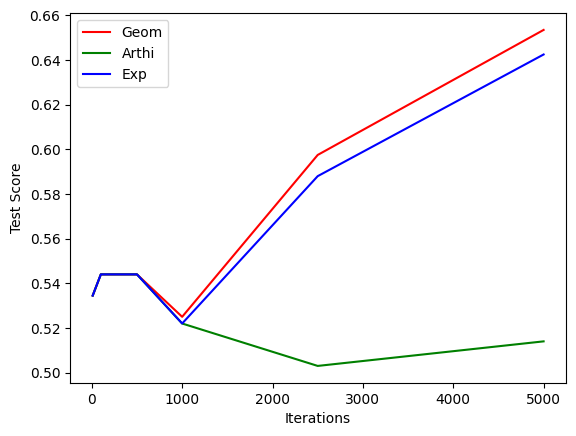

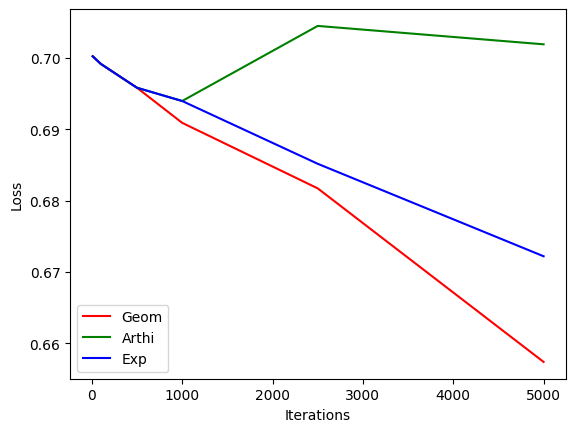

In [82]:
# Initialize neural network object and fit object
iterations = [10, 100, 500, 1000, 2500, 5000]
geom_decay = mlrose.GeomDecay()
arith_decay = mlrose.ArithDecay()
exp_decay = mlrose.ExpDecay()
decay_types = {
    "geom_decay": geom_decay,
    "arith_decay": arith_decay,
    "exp_decay": exp_decay,
}
sa_result = {}

for curr_iter in iterations:
    curr_iter_result = {}
    for curr_decay in decay_types.keys():
        schedule = decay_types[curr_decay]
        clf = mlrose.NeuralNetwork(
            hidden_nodes=[50, 10],
            activation="sigmoid",
            algorithm="simulated_annealing",
            schedule=schedule,
            max_iters=curr_iter,
            bias=True,
            is_classifier=True,
            learning_rate=0.1,
            # early_stopping=True,
            # clip_max=5,
            max_attempts=100,
            random_state=50,
        )

        start_time = timeit.default_timer()
        clf.fit(X_train, y_train)
        end_time = timeit.default_timer()
        rhc_time = end_time - start_time

        y_train_pred = clf.predict(X_train)

        y_train_accuracy = accuracy_score(np.asarray(y_train), np.asarray(y_train_pred))

        y_test_pred = clf.predict(X_test)
        y_test_accuracy = accuracy_score(np.asarray(y_test), np.asarray(y_test_pred))
        print("Time for iteration " + str(curr_iter) + ": " + str(rhc_time))
        print(
            "Train score for iteration " + str(curr_iter) + ": " + str(y_train_accuracy)
        )
        print(
            "Test score for iteration " + str(curr_iter) + ": " + str(y_test_accuracy)
        )

        curr_iter_result[curr_decay] = {
            "train_time": rhc_time,
            "train_score": y_train_accuracy,
            "test_score": y_test_accuracy,
            "fitness_Curve": clf.fitness_curve,
            "loss": clf.loss
        }
    sa_result[curr_iter] = curr_iter_result

sa_geom_train_time_results = []
sa_geom_train_score_results = []
sa_geom_test_score_results = []
sa_geom_loss_results = []
sa_arith_train_time_results = []
sa_arith_train_score_results = []
sa_arith_test_score_results = []
sa_arith_loss_results = []
sa_exp_train_time_results = []
sa_exp_train_score_results = []
sa_exp_test_score_results = []
sa_exp_loss_results = []

for an_iter in sa_result.keys():
    for curr_decay in sa_result[an_iter].keys():
        if ("geom" in curr_decay):
            sa_geom_train_time_results.append(sa_result[an_iter][curr_decay]['train_time'])
            sa_geom_train_score_results.append(sa_result[an_iter][curr_decay]['train_score'])
            sa_geom_test_score_results.append(sa_result[an_iter][curr_decay]['test_score'])
            sa_geom_loss_results.append(sa_result[an_iter][curr_decay]['loss'])
        if ("arith" in curr_decay):
            sa_arith_train_time_results.append(sa_result[an_iter][curr_decay]['train_time'])
            sa_arith_train_score_results.append(sa_result[an_iter][curr_decay]['train_score'])
            sa_arith_test_score_results.append(sa_result[an_iter][curr_decay]['test_score'])
            sa_arith_loss_results.append(sa_result[an_iter][curr_decay]['loss'])
        if ("exp" in curr_decay):
            sa_exp_train_time_results.append(sa_result[an_iter][curr_decay]['train_time'])
            sa_exp_train_score_results.append(sa_result[an_iter][curr_decay]['train_score'])
            sa_exp_test_score_results.append(sa_result[an_iter][curr_decay]['test_score'])
            sa_exp_loss_results.append(sa_result[an_iter][curr_decay]['loss'])

plt.plot(iterations, sa_geom_train_time_results, label='Geom', color='red')
plt.plot(iterations, sa_arith_train_time_results, label='Arthi', color='green')
plt.plot(iterations, sa_exp_train_time_results, label='Exp', color = 'blue')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Train Time")
plt.show()
plt.plot(iterations, sa_geom_train_score_results, label='Geom', color='red')
plt.plot(iterations, sa_arith_train_score_results, label='Arthi', color='green')
plt.plot(iterations, sa_exp_train_score_results, label='Exp', color = 'blue')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Train Score")
plt.show()
plt.plot(iterations, sa_geom_test_score_results, label='Geom', color='red')
plt.plot(iterations, sa_arith_test_score_results, label='Arthi', color='green')
plt.plot(iterations, sa_exp_test_score_results, label='Exp', color = 'blue')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Test Score")
plt.show()
plt.plot(iterations, sa_geom_loss_results, label='Geom', color='red')
plt.plot(iterations, sa_arith_loss_results, label='Arthi', color='green')
plt.plot(iterations, sa_exp_loss_results, label='Exp', color = 'blue')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

## Genetic Algorithm

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.502875, 0.5665, 0.5665, 0.5665, 0.5665, 0.5665]
Time for iteration 10: 126.67583059999743
Train score for iteration 10: 0.502875
Test score for iteration 10: 0.5095
[0.502875, 0.5665, 0.5665, 0.5665, 0.5665, 0.5665]
Time for iteration 100: 1566.2411812000064
Train score for iteration 100: 0.5665
Test score for iteration 100: 0.5465
[0.502875, 0.5665, 0.5665, 0.5665, 0.5665, 0.5665]
Time for iteration 500: 2453.6682960999897
Train score for iteration 500: 0.5665
Test score for iteration 500: 0.5465
[0.502875, 0.5665, 0.5665, 0.5665, 0.5665, 0.5665]
Time for iteration 1000: 3249.6588391000114
Train score for iteration 1000: 0.5665
Test score for iteration 1000: 0.5465
[0.502875, 0.5665, 0.5665, 0.5665, 0.5665, 0.5665]
Time for iteration 2500: 3102.7025574
Train score for iteration 2500: 0.5665
Test score for iteration 2500: 0.5465
[0.502875, 0.5665, 0.5665, 0.5665, 0.5665, 0.5665]
Time for iteration 5000: 3139.621797700005
Train score for iteration 5000: 0.5665
Test score for iteratio

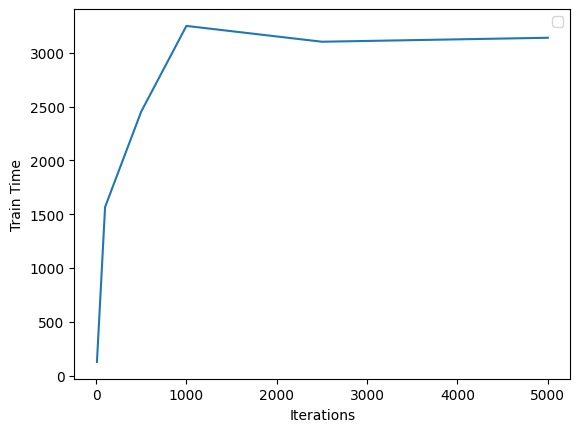

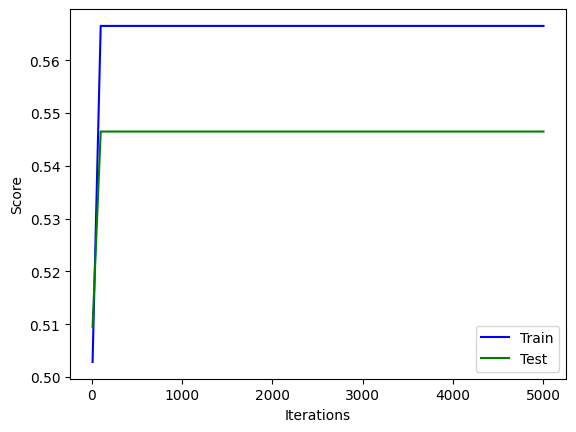

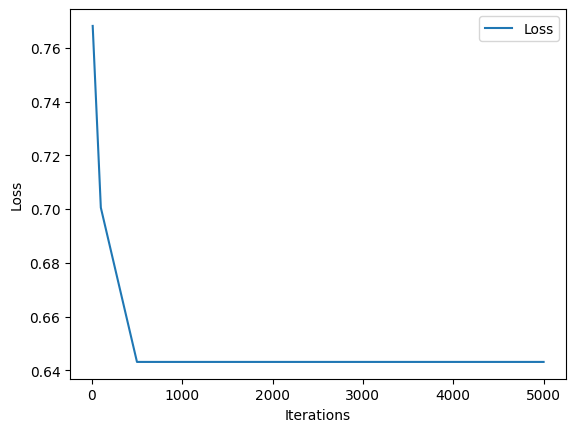

In [92]:
# Initialize neural network object and fit object
iterations = [10, 100, 500, 1000, 2500, 5000]
ga_result = {}

for curr_iter in iterations:
    clf = mlrose.NeuralNetwork(
        hidden_nodes=[50, 10],
        activation="sigmoid",
        algorithm="genetic_alg",
        max_iters=curr_iter,
        bias=True,
        is_classifier=True,
        learning_rate=0.01,
        early_stopping=True,
        pop_size=500,
        mutation_prob=0.3,
        clip_max=10,
        max_attempts=100,
        random_state=50,
    )

    clf.fit(X_train_scaled, y_train_hot)

    start_time = timeit.default_timer()
    clf.fit(X_train, y_train)
    end_time = timeit.default_timer()
    train_time = end_time - start_time

    y_train_pred = clf.predict(X_train)

    y_train_accuracy = accuracy_score(np.asarray(y_train), np.asarray(y_train_pred))

    y_test_pred = clf.predict(X_test)
    y_test_accuracy = accuracy_score(np.asarray(y_test), np.asarray(y_test_pred))
    print("Time for iteration " + str(curr_iter) + ": " + str(train_time))
    print("Train score for iteration " + str(curr_iter) + ": " + str(y_train_accuracy))
    print("Test score for iteration " + str(curr_iter) + ": " + str(y_test_accuracy))

    ga_result[curr_iter] = {
        "train_time": train_time,
        "train_score": y_train_accuracy,
        "test_score": y_test_accuracy,
        "fitness_Curve": clf.fitness_curve,
        "loss": clf.loss
    }

ga_train_time_results = []
ga_train_score_results = []
ga_test_score_results = []
ga_loss_results = []

for an_iter in ga_result.keys():
    ga_train_time_results.append(ga_result[an_iter]['train_time'])
    ga_train_score_results.append(ga_result[an_iter]['train_score'])
    ga_test_score_results.append(ga_result[an_iter]['test_score'])
    ga_loss_results.append(ga_result[an_iter]['loss'])

plt.plot(iterations, ga_train_time_results)
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Train Time")
plt.show()
plt.plot(iterations, ga_train_score_results, label="Train", color='blue')
plt.plot(iterations, ga_test_score_results, label="Test", color="green")
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Score")
plt.show()
plt.plot(iterations, ga_loss_results, label="Loss")
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()

## Algorithm Comparison

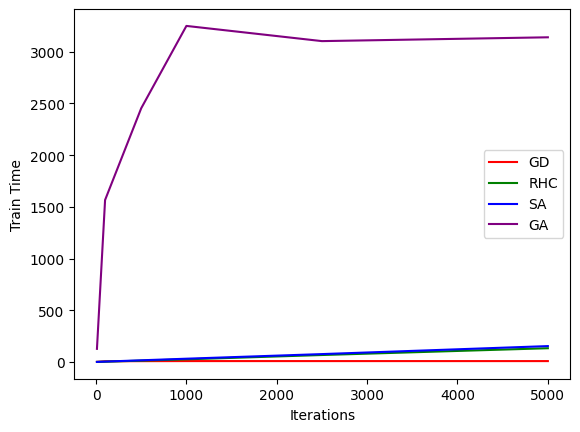

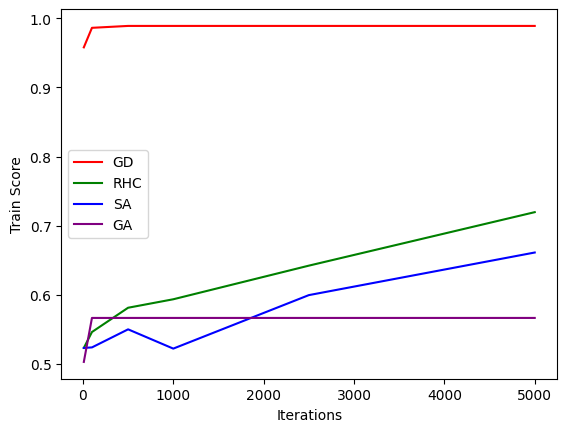

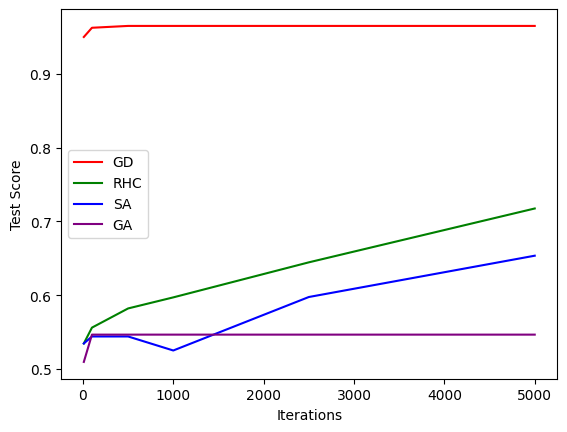

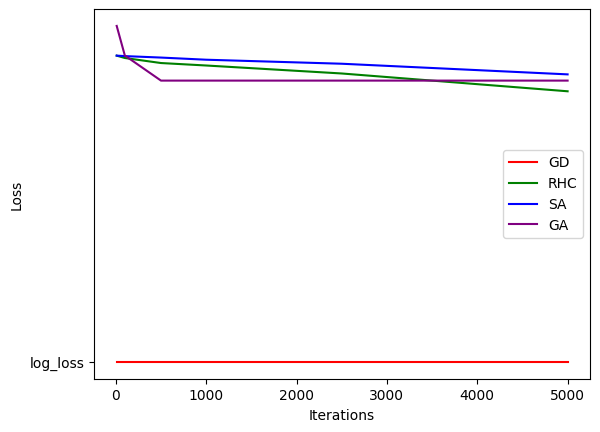

In [94]:
plt.plot(iterations, gd_train_time_results, label='GD', color='red')
plt.plot(iterations, rhc_train_time_results, label='RHC', color='green')
plt.plot(iterations, sa_geom_train_time_results, label='SA', color='blue')
plt.plot(iterations, ga_train_time_results, label='GA', color = 'purple')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Train Time")
plt.show()
plt.plot(iterations, gd_train_score_results, label='GD', color='red')
plt.plot(iterations, rhc_train_score_results, label='RHC', color='green')
plt.plot(iterations, sa_geom_train_score_results, label='SA', color = 'blue')
plt.plot(iterations, ga_train_score_results, label='GA', color = 'purple')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Train Score")
plt.show()
plt.plot(iterations, gd_test_score_results, label='GD', color='red')
plt.plot(iterations, rhc_test_score_results, label='RHC', color='green')
plt.plot(iterations, sa_geom_test_score_results, label='SA', color='blue')
plt.plot(iterations, ga_test_score_results, label='GA', color = 'purple')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Test Score")
plt.show()
plt.plot(iterations, gd_loss_results, label='GD', color='red')
plt.plot(iterations, rhc_loss_results, label='RHC', color='green')
plt.plot(iterations, sa_geom_loss_results, label='SA', color='blue')
plt.plot(iterations, ga_loss_results, label='GA', color = 'purple')
plt.legend(loc="best")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.show()